## Importando as bibliotecas necessárias

In [24]:
import pandas as pd

## Carregando o arquivo CSV com os dados dos passageiros

In [25]:
passageiros=pd.read_csv("raw-data/passageiros.csv")

## Visualizando as primeiras linhas dos dados

In [26]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


## Importando a biblioteca Seaborn

In [27]:
import seaborn as sns

## Configurando o tamanho e as fontes das figuras

In [28]:
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (10,6)
mpl.rcParams["font.size"] = 20

## Criando um gráfico de linha para visualizar a quantidade de passageiros ao longo do tempo

<Axes: xlabel='tempo', ylabel='passageiros'>

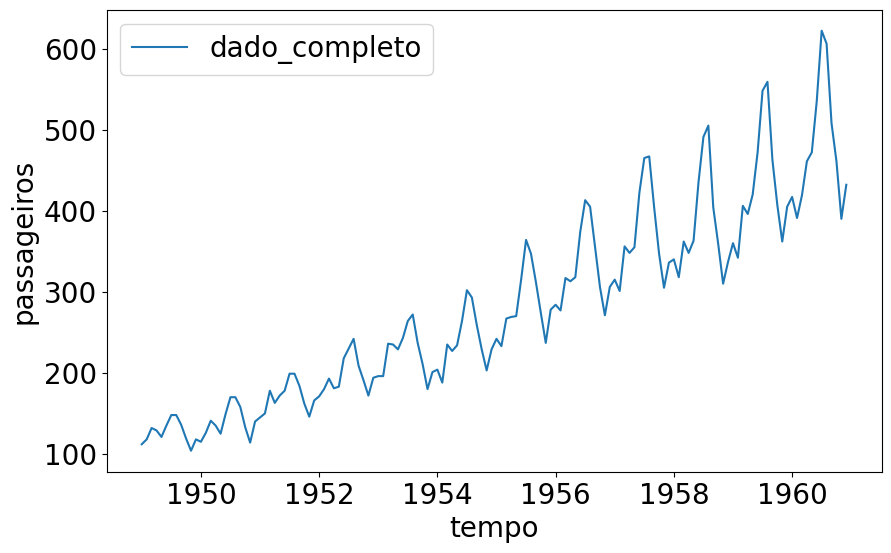

In [29]:
sns.lineplot(x="tempo", y="passageiros", data=passageiros, label="dado_completo")

## Importando o StandardScaler da biblioteca Scikit-learn para escalonamento dos dados

In [30]:
from sklearn.preprocessing import StandardScaler

## Instanciando o StandardScaler

In [31]:
sc=StandardScaler()

## Ajustando o StandardScaler aos dados

In [32]:
sc.fit(passageiros)

StandardScaler()

## Normalizando os dados

In [33]:
dado_normalizado=sc.transform(passageiros)

## Separando os dados normalizados em variáveis x e y

In [34]:
x=dado_normalizado[:,0]
y=dado_normalizado[:,1]

## Importando o Matplotlib para visualização

In [35]:
import matplotlib.pyplot as plt

## Plotando os dados normalizados em um gráfico de linha

Text(0.5, 0, 'Data')

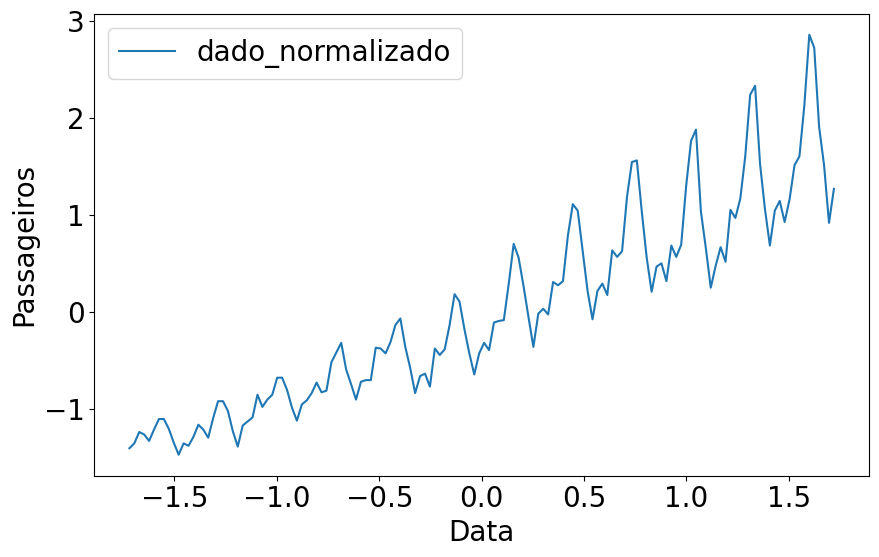

In [36]:
sns.lineplot(x=x, y=y, label="dado_normalizado")
plt.ylabel("Passageiros")
plt.xlabel("Data")

## Definindo os tamanhos de treino e teste

In [37]:
size_treino=int(len(passageiros)*0.9)
size_teste=len(passageiros)-size_treino

## Separando os dados de treino

In [38]:
x_treino=x[0:size_treino]
y_treino=y[0:size_treino]

## Separando os dados de teste

In [39]:
x_teste=x[size_treino:len(passageiros)]
y_teste=y[size_treino:len(passageiros)]

## Plotando os dados de treino e teste

Text(0.5, 0, 'Data')

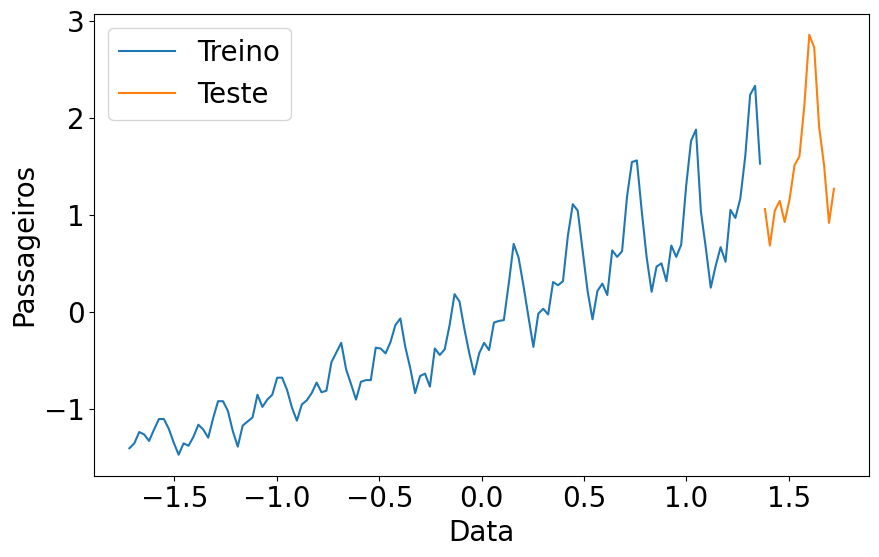

In [40]:
sns.lineplot(x=x_treino, y=y_treino, label="Treino")
sns.lineplot(x=x_teste, y=y_teste, label="Teste")
plt.ylabel("Passageiros")
plt.xlabel("Data")